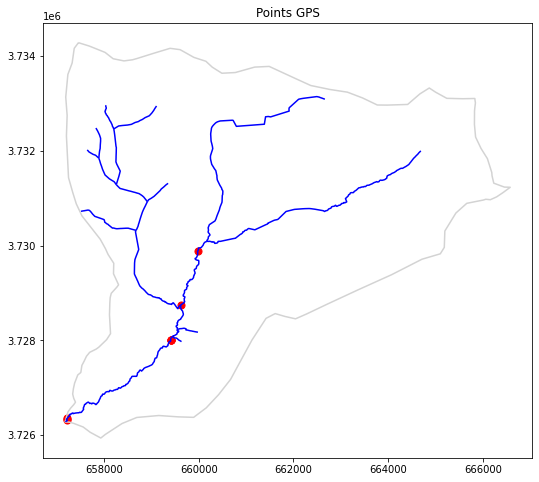

In [21]:
import pyproj
from shapely.geometry import Point
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import pandas as pd

# Créer une liste de points GPS

# Créer une fonction pour convertir les coordonnées en Lambert 93
# Créer une fonction pour convertir les coordonnées de WGS 84 (Google Earth) en Lambert 93
def convert_to_lambert(point):
    # Définir le système de coordonnées source (WGS 84)
    wgs84 = pyproj.CRS("EPSG:4326")
    
    # Définir le système de coordonnées cible (Lambert 93)
    lambert93 = pyproj.CRS("EPSG:27573")
    
    # Créer un transformateur de coordonnées
    transformer = pyproj.Transformer.from_crs(wgs84, lambert93, always_xy=True)
    
    # Effectuer la transformation
    lon, lat = point.x, point.y
    x, y = transformer.transform(lon, lat)
    
    return Point(x, y)


# Coordonnées géographiques d'origine
points_data = [
    {'name': 'point13_29_07_15', 'id': 13, 'latitude': 48.82745, 'longitude': 3.11332},
    {'name': 'point14_29_07_15', 'id': 14, 'latitude': 48.82758, 'longitude': 3.11309},
    {'name': 'point15_29_07_15', 'id': 15, 'latitude': 48.82772, 'longitude': 3.1133},
    {'name': 'point34_28_06_16', 'id': 34, 'latitude': 48.842323, 'longitude': 3.143102},
    {'name': 'point35_03_08_16', 'id': 35, 'latitude': 48.85914, 'longitude': 3.15124},
    {'name': 'point48_14_04_18','id': 48, 'latitude': 48.8489348, 'longitude': 3.1462324},
    {'name':'Point46_17_06_19','id':46,'latitude': 48.842323, 'longitude': 3.143102},
    {'name':'Point50_13_10_23','id':50,'latitude': 48.842323, 'longitude': 3.143102},
    {'name':'Point51_13_10_23','id':51,'latitude': 48.842323, 'longitude': 3.143102}
]

# Créer un GeoDataFrame à partir des coordonnées géographiques
gdf = gpd.GeoDataFrame(points_data, geometry=[Point(xy) for xy in zip([point['longitude'] for point in points_data], [point['latitude'] for point in points_data])])

# Convertir les coordonnées en Lambert 93
gdf['geometry'] = gdf['geometry'].apply(convert_to_lambert)



# Charger une carte de fond (vous pouvez utiliser votre propre carte si vous le souhaitez)
bv = gpd.read_file('limites_avenelles_l3.shp')
river=gpd.read_file('reseau_hydraugraphique_l3.shp')

# Ploter les points sur la carte de fond
fig, ax = plt.subplots(figsize=(10, 8))
bv.plot(ax=ax, color='lightgray')
river.plot(ax=ax,color='blue')
gdf.plot(ax=ax, marker='o', color='red', markersize=50)
plt.title('Points GPS')
plt.show()



In [22]:
gdf.head()

,name,id,latitude,longitude,geometry
0,point13_29_07_15,13,48.827450,3.113320,POINT (657229.114 3726322.585)
1,point14_29_07_15,14,48.827580,3.113090,POINT (657212.033 3726336.931)
2,point15_29_07_15,15,48.827720,3.113300,POINT (657227.357 3726352.697)
3,point34_28_06_16,34,48.842323,3.143102,POINT (659406.889 3728003.173)
4,point35_03_08_16,35,48.859140,3.151240,POINT (659987.693 3729885.537)


In [32]:
params = pd.read_csv('/Users/marcoul/Desktop/Mines_2A/Molonari/MOLONARI_projet_3-/inversion/Inversé/params.csv',sep=',')

In [34]:
params[params['id'] == gdf['id']]

ValueError: Can only compare identically-labeled Series objects

ValueError: The dataframe and given column have different number of rows.

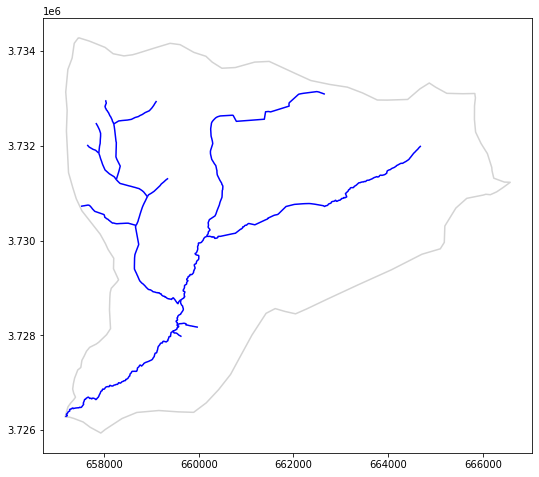

In [28]:
# Afficher carte avec échelle de couleurs selon params.n

# Charger une carte de fond (vous pouvez utiliser votre propre carte si vous le souhaitez)
bv = gpd.read_file('limites_avenelles_l3.shp')
river=gpd.read_file('reseau_hydraugraphique_l3.shp')

# Ploter les points sur la carte de fond
fig, ax = plt.subplots(figsize=(10, 8))
bv.plot(ax=ax, color='lightgray')
river.plot(ax=ax,color='blue')
gdf.plot(ax=ax, marker='o', column=params['n'], cmap='viridis', markersize=50, legend=True)
plt.title('Points GPS')
plt.show()